<a href="https://colab.research.google.com/github/yesimcebeci/Customer-Churn-Classification/blob/main/EDA_and_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MovieLens Recommender System 

## Overview

In this project ,I chose the MovieLens dataset and managed to create a movie recommendation system that somehow simulates some of the most successful recommendation engine products, such as Spotify, YouTube, and Netflix.

This notebook is going to explain how I worked throughout the entire life cycle of this project, and provide my solutions to some technical issues.



For the recommender system I will use Content-based and Collaborative Recommender systems are built on MovieLens dataset with 100,000 movie ratings. These Recommender systems were built using Pandas operations and by fitting Machine Learning models to suggest movies for the users based on similar users and for queries specific to genre, user, movie, rating.

## Business Understanding

MovieLens is a web-based recommender system and virtual community that recommends movies for its users to watch, based on their film preferences using collaborative filtering of members' movie ratings and movie reviews.
My goal is in this notebook, build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies as  using clustering. Clustering is a great for this as it takes data and forms groups which have the most similarities. 

## Data Understanding

https://grouplens.org/datasets/movielens/latest/

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files  **u.user**,  **movies.csv** and  **ratings.csv**.

- **movies.csv**: Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

**movieId**: Unique id for each movie

**title**: Name of movies followed by their year of release

**genres**: categories that a movie might fall into separated by |

- **ratings.csv**: A table that records all the users’ rating behaviors, covering their rates and the time stamp when they posted the rates.

**userId**: Unique id for each user

**movieId**: Unique id for each movie

**rating**: Rating given by userId for movieId. Ratings are made on a 5-star scale with 0.5 increments.

**timestamp**: Time when rating was given


- **u.user**: A table that records each user’s unique ID , age , sex, occupation and zip code.



## Importing Libraries

In [103]:
# importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [3]:
movie_df = pd.read_csv('movies.csv')
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
rating_df = pd.read_csv('ratings.csv')
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
u_cols = ['userId', 'age', 'sex', 'occupation', 'zip_code']
users_df = pd.read_csv('u.user', sep='|', names=u_cols,
                       encoding='latin-1', parse_dates=True) 

users_df


,userId,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [11]:
users_df['age'].value_counts()

30    39
25    38
22    37
28    36
27    35
      ..
7      1
66     1
11     1
10     1
73     1
Name: age, Length: 61, dtype: int64

In [12]:
users_df['occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [110]:
users_df['sex'].replace({'F':0,'M':1},inplace=True)
# users_df['age'].replace({"0-18":10 , "18-24":20, "25-34":30, "35-44":40, "45-49":45, "50-55":50,"56-73":65},inplace=True)
users_df['occupation'].replace({"other":0,"educator":1,"artist":2,\
                             "administrator":3,"student":4, "librarian":5,\
                             "doctor":6,"executive":7,"entertainment":8,\
                             "homemaker":9,"engineer":10,"lawyer":11,"programmer":12,\
                             "retired":13,"salesman":14,"scientist":15,"writer":16,\
                             "technician":17,"none":18,"marketing":19 , "healthcare":20},inplace=True)
users_df['occupation'].astype(np.int64)
users_df.head()


,userId,age,sex,occupation,zip_code
0,1,24,1,17,85711
1,2,53,0,0,94043
2,3,23,1,16,32067
3,4,24,1,17,43537
4,5,33,0,0,15213


In [112]:
users_df['occupation'].value_counts()

4     196
0     105
1      95
3      79
10     67
12     66
5      51
16     45
7      32
15     31
2      28
17     27
19     26
8      18
20     16
13     14
11     12
14     12
18      9
9       7
6       7
Name: occupation, dtype: int64

In [111]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userId      943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    int64 
 3   occupation  943 non-null    int64 
 4   zip_code    943 non-null    object
dtypes: int64(4), object(1)
memory usage: 37.0+ KB


Some observation from dataset:
- Genres column has several genres , we need seperate them to do meaningful analysis 
- users_df  has zip_code columns we dont use this feature for the future analysis. it can be dropped.

## Exploratory Data Analysis and Data Cleaning

In [19]:
# Merging ratings and movies data

merged_movies = pd.merge(movie_df, rating_df, on='movieId', how='inner')
merged_movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [20]:
# Dropping the timestamp column
merged_movies = merged_movies.drop('timestamp', axis=1)


In [21]:
merged_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [22]:
merged_movies['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
53       20
207      20
431      20
442      20
189      20
Name: userId, Length: 610, dtype: int64

In [36]:
df_merged =  pd.merge(merged_movies, users_df, on='userId')
df_merged = df_merged.drop('zip_code' , axis =1)
df_merged

,movieId,title,genres,userId,rating,age,sex,occupation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,24,1,17
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,24,1,17
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,24,1,17
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,24,1,17
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,24,1,17
...,...,...,...,...,...,...,...,...
100831,193579,Jon Stewart Has Left the Building (2015),Documentary,184,3.5,37,1,5
100832,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,37,1,5
100833,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,37,1,5
100834,193585,Flint (2017),Drama,184,3.5,37,1,5


In [37]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   movieId     100836 non-null  int64  
 1   title       100836 non-null  object 
 2   genres      100836 non-null  object 
 3   userId      100836 non-null  int64  
 4   rating      100836 non-null  float64
 5   age         100836 non-null  int64  
 6   sex         100836 non-null  int64  
 7   occupation  100836 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 6.9+ MB


In [38]:
df_merged.isna().sum()

movieId       0
title         0
genres        0
userId        0
rating        0
age           0
sex           0
occupation    0
dtype: int64

In [39]:

# Extracting release year from movie title
df_merged['year'] = df_merged['title'].str.extract('.*\((.*)\).*',expand = False)
df_merged['year'].unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '1937', '1954', '2001',
       '2002', '2003', '2004', '2005', '2006', '1972', '1961', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '1966', '1944', '1957', '1949', '1955', '1936', '2017',
       '1958', '1935', '1943', '1927', '1953', '1926', '1950', '1956',
       '1923', '1902', '1920', '2018', '1948', '1928', '1934', '1916',
       '1908', '1932', '1925', '1921', '1915', '1924', '1929', '1903',
       '1919', nan, '1917', '2006–2007'], dtype=object)

In [40]:
# Changing this to 2007
df_merged['year'] = df_merged['year'].replace("2006–2007","2007")
df_merged['year'].unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '1937', '1954', '2001',
       '2002', '2003', '2004', '2005', '2006', '1972', '1961', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '1966', '1944', '1957', '1949', '1955', '1936', '2017',
       '1958', '1935', '1943', '1927', '1953', '1926', '1950', '1956',
       '1923', '1902', '1920', '2018', '1948', '1928', '1934', '1916',
       '1908', '1932', '1925', '1921', '1915', '1924', '1929', '1903',
       '1919', nan, '1917'], dtype=object)

In [56]:
# df_merged[df_merged['year'] == "nan"]
df_nan = df_merged[pd.isna(df_merged['year'])]
df_nan

,movieId,title,genres,userId,rating,age,sex,occupation,year
33055,140956,Ready Player One,Action|Sci-Fi|Thriller,380,3.0,32,1,10,NaN
37532,167570,The OA,(no genres listed),414,4.0,24,1,12,NaN
40842,143410,Hyena Road,(no genres listed),448,2.0,23,1,8,NaN
41839,162414,Moonlight,Drama,462,5.0,19,0,4,NaN
48424,140956,Ready Player One,Action|Sci-Fi|Thriller,514,3.0,27,1,12,NaN
49731,40697,Babylon 5,Sci-Fi,528,0.5,18,1,4,NaN
52739,156605,Paterson,(no genres listed),567,4.5,24,1,8,NaN
58218,171495,Cosmos,(no genres listed),599,4.0,22,0,4,NaN
65159,176601,Black Mirror,(no genres listed),62,5.0,27,0,3,NaN
68319,140956,Ready Player One,Action|Sci-Fi|Thriller,305,4.5,23,1,12,NaN


In [59]:
df_merged = df_merged.dropna(subset=['year'],how='any')
df_merged['year'].unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '1937', '1954', '2001',
       '2002', '2003', '2004', '2005', '2006', '1972', '1961', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '1966', '1944', '1957', '1949', '1955', '1936', '2017',
       '1958', '1935', '1943', '1927', '1953', '1926', '1950', '1956',
       '1923', '1902', '1920', '2018', '1948', '1928', '1934', '1916',
       '1908', '1932', '1925', '1921', '1915', '1924', '1929', '1903',
       '1919', '1917'], dtype=object)

In [85]:
df_merged['genres'] = df_merged['genres'].replace('(no genres listed)', np.nan)
print('Number of missing values in genres column:',df_merged['genres'].isna().sum())

# dropping rows with missing genres
df_merged= df_merged.dropna(subset=['genres'],how='any')
df_merged= df_merged.reset_index(drop=True)

df_merged.info()

Number of missing values in genres column: 38
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100781 entries, 0 to 100780
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   movieId     100781 non-null  int64  
 1   title       100781 non-null  object 
 2   genres      100781 non-null  object 
 3   userId      100781 non-null  int64  
 4   rating      100781 non-null  float64
 5   age         100781 non-null  int64  
 6   sex         100781 non-null  int64  
 7   occupation  100781 non-null  object 
 8   year        100781 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 6.9+ MB


In [86]:
#Grouping the rating based on user

ratings_by_users = df_merged.groupby('userId').agg({'rating': [np.size, np.mean]})
ratings_by_users

rating          
         size      mean
userId                 
1         232  4.366379
2          29  3.948276
3          39  2.435897
4         216  3.555556
5          44  3.636364
...       ...       ...
606      1115  3.657399
607       187  3.786096
608       831  3.134176
609        37  3.270270
610      1302  3.688556

[610 rows x 2 columns]

In [100]:
user_1 = df_merged[df_merged['userId'] == 1]
user_1


,movieId,title,genres,userId,rating,age,sex,occupation,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,24,1,17,1995
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,24,1,17,1995
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,24,1,17,1995
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,24,1,17,1995
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,24,1,17,1995
...,...,...,...,...,...,...,...,...,...
227,3744,Shaft (2000),Action|Crime|Thriller,1,4.0,24,1,17,2000
228,3793,X-Men (2000),Action|Adventure|Sci-Fi,1,5.0,24,1,17,2000
229,3809,What About Bob? (1991),Comedy,1,4.0,24,1,17,1991
230,4006,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi,1,4.0,24,1,17,1986


In [87]:
# Grouping the ratings based on movies
ratings_by_movies = df_merged.groupby('title').agg({'rating': [np.size, np.mean]})
ratings_by_movies


rating          
                                            size      mean
title                                                     
'71 (2014)                                     1  4.000000
'Hellboy': The Seeds of Creation (2004)        1  4.000000
'Round Midnight (1986)                         2  3.500000
'Salem's Lot (2004)                            1  5.000000
'Til There Was You (1997)                      2  4.000000
...                                          ...       ...
eXistenZ (1999)                               22  3.863636
xXx (2002)                                    24  2.770833
xXx: State of the Union (2005)                 5  2.000000
¡Three Amigos! (1986)                         26  3.134615
À nous la liberté (Freedom for Us) (1931)      1  1.000000

[9681 rows x 2 columns]

In [88]:
rating_count = df_merged.groupby('title')['rating']
rating_count = rating_count.count().sort_values(ascending=False)
rating_count[:25]


title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

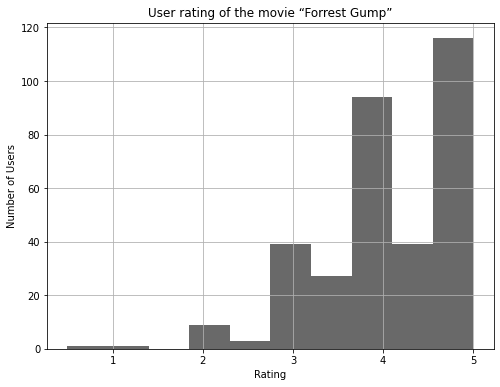

In [101]:
# User rating of the movie “Forrest Gump”
plt.figure(figsize=(8,6))
movies_grouped = df_merged.groupby('title')
Forrest_Gump = movies_grouped.get_group('Forrest Gump (1994)')
Forrest_Gump['rating'].hist(color = 'dimgray')
plt.title('User rating of the movie “Forrest Gump”')
plt.xlabel('Rating')
plt.ylabel('Number of Users')

plt.show()


In [89]:
# Checking duplicates if there is any
df_merged.duplicated().sum()

0

## Visual Representations of Data

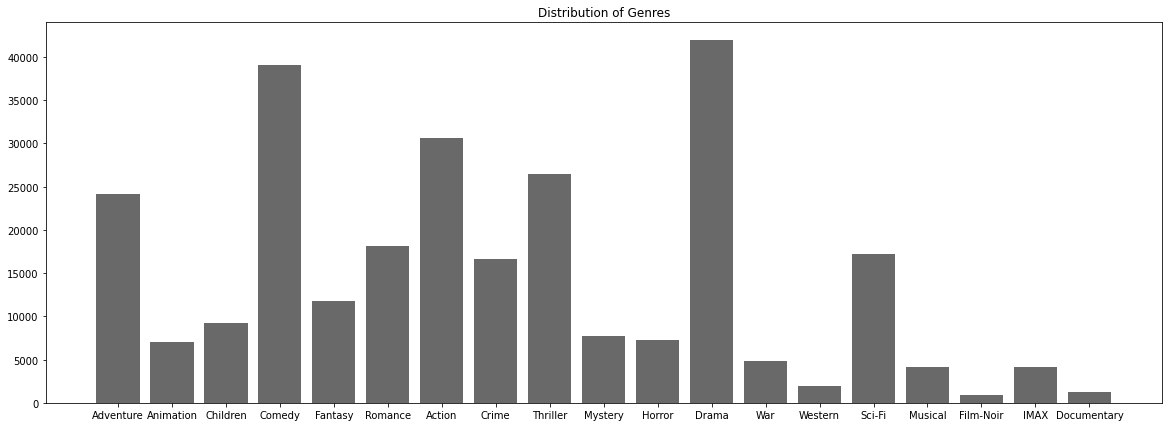

In [91]:
# Distribution of Genres

plt.figure(figsize=(20,7))
genres = df_merged['genres'].apply(lambda genres_movie : str(genres_movie).split("|"))

genres_count = {}
for genres_movie in genres:
    for genre in genres_movie:
        if(genres_count.get(genre,False)):
            genres_count[genre]=genres_count[genre]+1
        else:
            genres_count[genre] = 1       
plt.bar(genres_count.keys(),genres_count.values(),color='dimgray');
plt.title('Distribution of Genres');


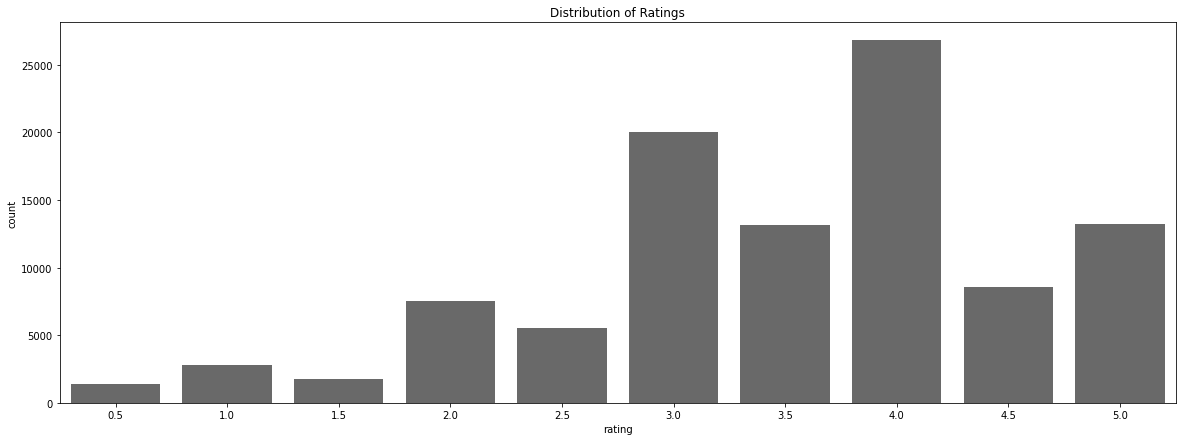

In [92]:
# Distribution of Ratings
plt.figure(figsize=(20,7))
sns.countplot(df_merged['rating'], color = 'dimgray')
plt.title('Distribution of Ratings');

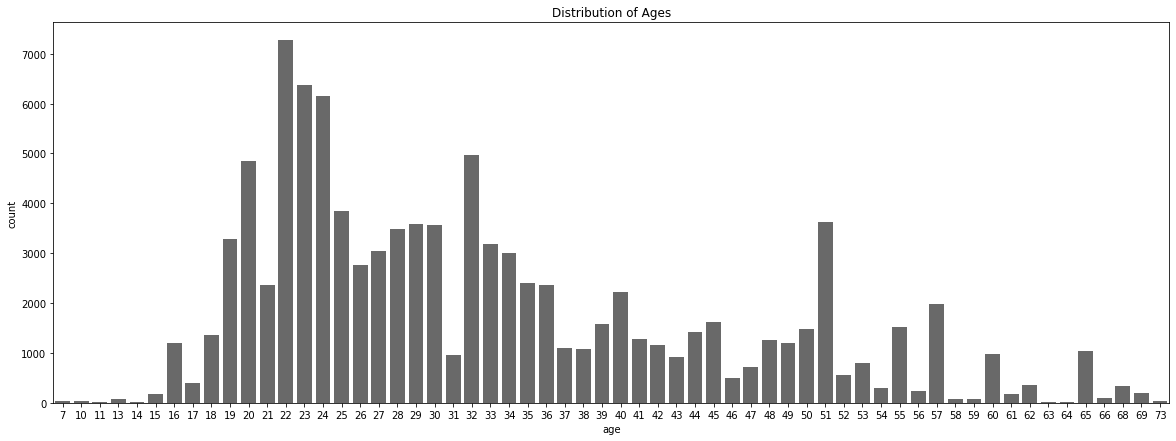

In [93]:
# Distribution of Ages
plt.figure(figsize=(20,7))
sns.countplot(df_merged['age'], color = 'dimgray')
plt.title('Distribution of Ages');

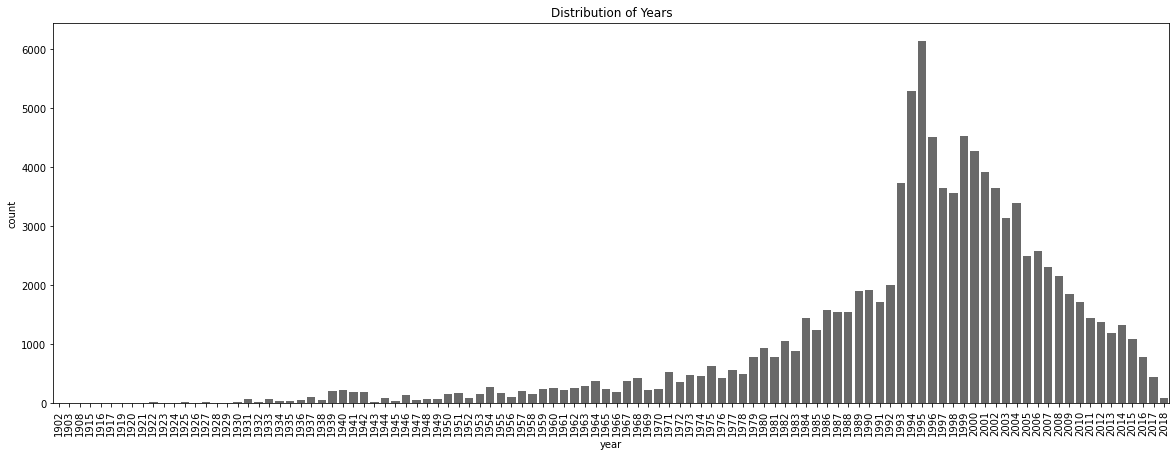

In [94]:
# Distribution of Year
df_year_asc = df_merged.sort_values('year' , ascending = True)
plt.figure(figsize=(20,7))
sns.countplot(df_year_asc['year'], color = 'dimgray')
plt.xticks(rotation=90)
plt.title('Distribution of Years');

## Feature Engineering

In [95]:
Genre = df_merged['genres']
Genre = Genre.str.get_dummies()
df_merged_ohe = pd.concat(
    [df_merged.drop(
        ['genres'],
        axis=1
    ),
     Genre],
    axis=1
)
df_merged_ohe.head()


,movieId,title,userId,rating,age,sex,occupation,year,Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,4.0,24,1,17,1995,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,Grumpier Old Men (1995),1,4.0,24,1,17,1995,0,0,...,0,0,0,0,0,1,0,0,0,0
2,6,Heat (1995),1,4.0,24,1,17,1995,1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,Seven (a.k.a. Se7en) (1995),1,5.0,24,1,17,1995,0,0,...,0,0,0,0,1,0,0,1,0,0
4,50,"Usual Suspects, The (1995)",1,5.0,24,1,17,1995,0,0,...,0,0,0,0,1,0,0,1,0,0


In [96]:
df_merged_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100781 entries, 0 to 100780
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      100781 non-null  int64  
 1   title        100781 non-null  object 
 2   userId       100781 non-null  int64  
 3   rating       100781 non-null  float64
 4   age          100781 non-null  int64  
 5   sex          100781 non-null  int64  
 6   occupation   100781 non-null  object 
 7   year         100781 non-null  object 
 8   Action       100781 non-null  int64  
 9   Adventure    100781 non-null  int64  
 10  Animation    100781 non-null  int64  
 11  Children     100781 non-null  int64  
 12  Comedy       100781 non-null  int64  
 13  Crime        100781 non-null  int64  
 14  Documentary  100781 non-null  int64  
 15  Drama        100781 non-null  int64  
 16  Fantasy      100781 non-null  int64  
 17  Film-Noir    100781 non-null  int64  
 18  Horror       100781 non-

# References

- https://towardsdatascience.com/movie-recommendation-system-based-on-movielens-ef0df580cd0e

- 